# Лабораторная работа 1 - Исследование набора данных

## 1. Выбор исследуемого датасета

Мы выбрали датасет, содержащий данные о ценах на акции Apple с 1980 по 2020 год.

## 2. Краткое описание выбранного датасета

### a. Предметная область, источник данных, характер данных

* Предметная область: Финансовые данные о ценах на акции компании Apple
* Источник данных: Датасет был получен с сайта Kaggle.com ([ссылка на датасет](https://www.kaggle.com/datasets/aayushmishra1512/faang-complete-stock-data/?select=Apple.csv))
* Характер данных: Данные являются реальными

### b. Атрибуты, представленные в датасете

0. Date
    * Тип: строковый (дата)
    * Значение: дата проведения торгов (данный атрибут будет проигнорирован при проведении анализа)
1. Open
    * Тип: числовой
    * Значение: цена акции на момент открытия биржи
2. High
    * Тип: числовой
    * Значение: максимальная цена акции в данный день торгов
3. Low
    * Тип: числовой
    * Значение: минимальная цена акции в данный день торгов
4. Close
    * Тип: числовой
    * Значение: цена акции на момент закрытия биржи
5. Close Adj
    * Тип: числовой
    * Значение: скорректированная цена закрытия (учтены корпоративные события)
6. Volume
    * Тип: числовой
    * Значение: объём торгов в данный день

Посмотрим на первые пять значений:

In [1]:
import pandas as pd

df = pd.read_csv('Apple.csv.xls')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


### c. Описание задачи анализа

* Данное исследование направлено на анализ и понимание динамики цен акций компании Apple с 1980 по 2020 год. Основными целями являются выявление трендов в изменении цен акций. Дополнительно, мы планируем провести анализ объемов торгов и исследовать корреляции между ценами акций и объемами торгов, чтобы лучше понять рыночную динамику Apple.

# 3. Анализ атрибутов

## a.1. Средние значения атрибутов

Для нахождения среднего значения, мы используем метод `.mean()`, который вычисляет среднее значение для каждого числового атрибута и возвращает Series с этими значениями.

In [2]:
df = df.drop('Date', axis=1) # Игнорируем Date
mean_value = df.mean()
display(mean_value)

Open         9.013322e+00
High         9.107720e+00
Low          8.920993e+00
Close        9.018933e+00
Adj Close    8.478195e+00
Volume       3.413188e+08
dtype: float64

## a.2. СКО атрибутов

Для нахождения стандартного отклонения (СКО) атрибутов, мы используем метод `.std()`, который вычисляет стандартное отклонение для каждого числового атрибута и возвращает Series с этими значениями.

In [3]:
std_deviation = df.std()
display(std_deviation)

Open         1.684264e+01
High         1.702810e+01
Low          1.667723e+01
Close        1.686835e+01
Adj Close    1.646616e+01
Volume       3.426534e+08
dtype: float64


## b.1. Гистограмма распределения значений

Для отображения гистограммы распределения значений атрибута, мы используем метод `.hist()`, который строит гистограмму, представляя частоту встречаемости различных значений в выбранном атрибуте.

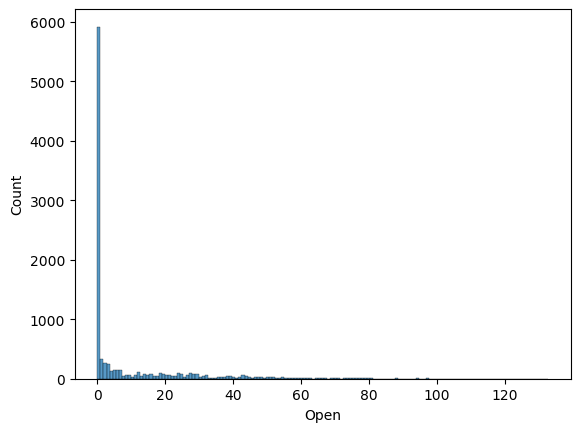

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%pip install seaborn
import seaborn as sns

sns.histplot(data=df, x='Open')
plt.show()

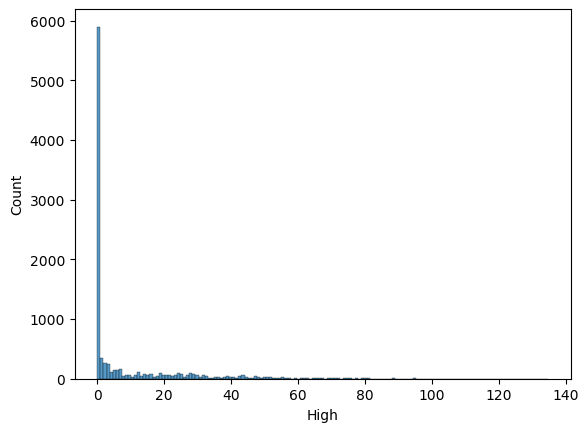

In [5]:
sns.histplot(data=df, x='High')
plt.show()

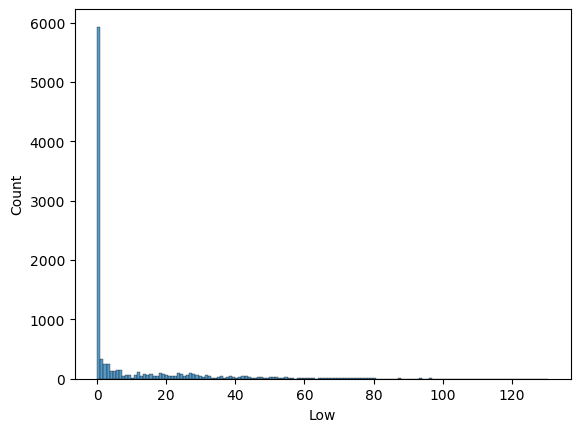

In [6]:
sns.histplot(data=df, x='Low')
plt.show()

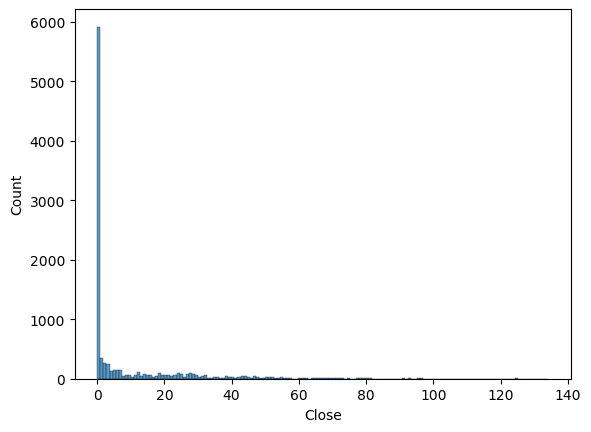

In [7]:
sns.histplot(data=df, x='Close')
plt.show()

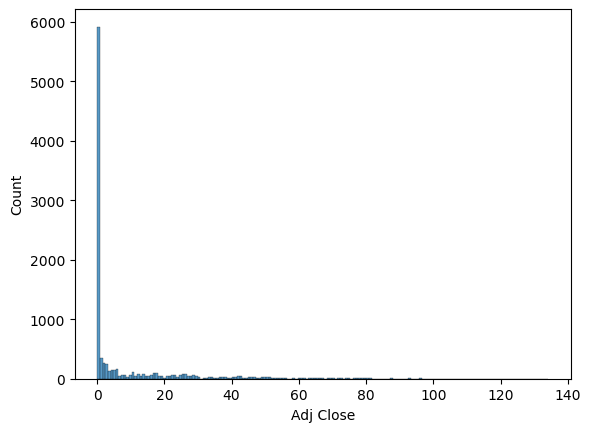

In [8]:
sns.histplot(data=df, x='Adj Close')
plt.show()

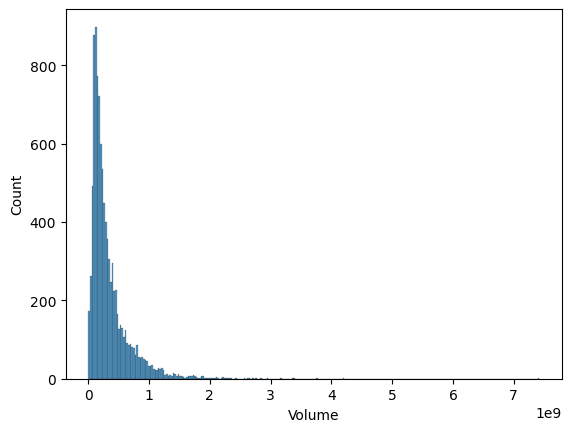

In [9]:
sns.histplot(data=df, x='Volume')
plt.show()

## b.2. Проверка наличия выбросов


### 1. C помощью критерия фильтрации (правила трёх сигм)

Посчитать кол-во выбросов можно с помощью правила трёх сигм - это статистический метод для определения выбросов в данных, основанный на предположении, что в нормальном распределении около 99.7% данных находятся в пределах трёх стандартных отклонений от среднего.

In [10]:
for column in df.columns:
    lower_bound = mean_value[column] - 3 * std_deviation[column]
    upper_bound = mean_value[column] + 3 * std_deviation[column]
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    print("Выбросы в", column + ":", len(outliers))

Выбросы в Open: 216
Выбросы в High: 218
Выбросы в Low: 216
Выбросы в Close: 217
Выбросы в Adj Close: 223
Выбросы в Volume: 195


### 2. C помощью диаграммы размаха

Увидеть выбросы визуально можно с помощью диаграммы размаха (box plot) - это графическое представление распределения данных, позволяющее визуализировать статистические характеристики, такие как медиана, квартили и выбросы, в виде ящика, усов и точек.

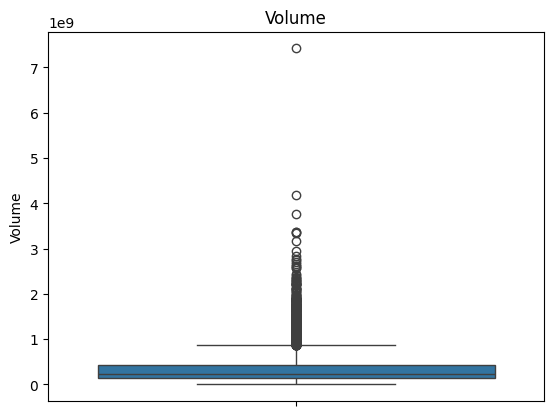

In [11]:
sns.boxplot(df['Volume'])
plt.title('Volume')
plt.show()

## c. Определение пропущенных значений


In [12]:
print(df.isnull().sum())

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


Были найдены 6 пропущенных значений, выведем строки с этими значениями.

In [13]:
rows_with_missing_values = df[df.isna().any(axis=1)]
print(rows_with_missing_values)

     Open  High  Low  Close  Adj Close  Volume
165   NaN   NaN  NaN    NaN        NaN     NaN


## d. Вариант обработки пропущенных значений

Так как мы обнаружили единственную строку, где все атрибуты не являются числами, её можно не обрабатывать, поскольку она не вносит вклад в анализ данных и не оказывает влияния на результаты нашей работы.

# 4. Определение корреляции между параметрами

## a,b. Определение высококоррелированных и низкокоррелированных параметров

Коэффициент корреляции Пирсона - инструмент для измерения степени линейной зависимости между двумя переменными, варьирующийся от -1 (полная отрицательная корреляция) до 1 (положительная корреляция), где 0 указывает на отсутствие линейной связи.

In [14]:
corr = df.corr()
display(corr)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999932,0.999930,0.999864,0.999004,-0.142183
High,0.999932,1.000000,0.999894,0.999929,0.999140,-0.141216
Low,0.999930,0.999894,1.000000,0.999927,0.999050,-0.143716
Close,0.999864,0.999929,0.999927,1.000000,0.999189,-0.142465
Adj Close,0.999004,0.999140,0.999050,0.999189,1.000000,-0.149676
Volume,-0.142183,-0.141216,-0.143716,-0.142465,-0.149676,1.000000


Таким образом, высококоррелированы между собой атрибуты 'Open', 'High', 'Low', 'Close', 'Adj Close', а низкую корреляцию со всеми другими атрибутами имеет атрибут 'Volume'.

## c. Построение матрицы графиков рассеивания

Для отображения матрицы графиков рассеивания (scatter plot matrix) мы используем функцию `seaborn.pairplot()`, которая создает сетку графиков рассеивания для анализа взаимосвязи между парами атрибутов.

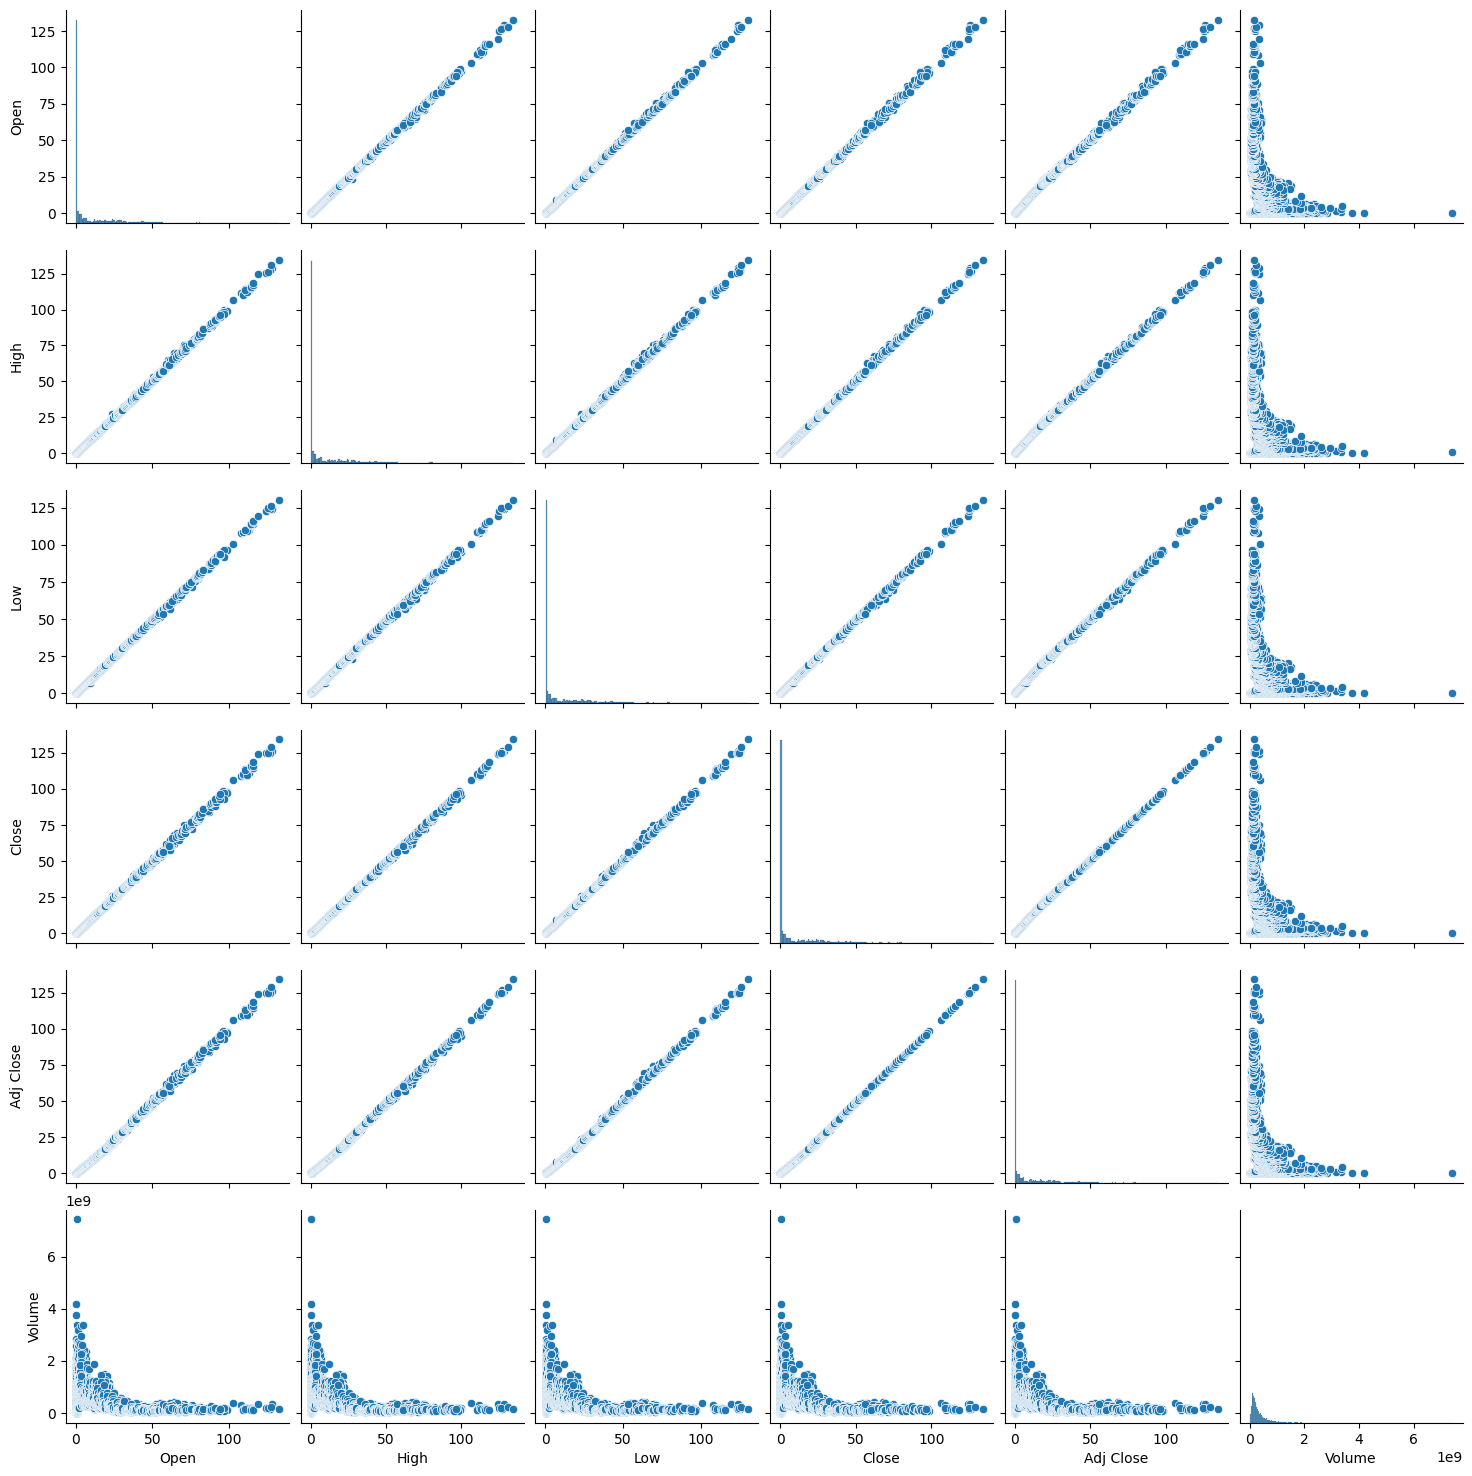

In [15]:
sns.pairplot(df)
plt.show()

## d. Анализ полученных результатов

Матрица графиков рассеивания предоставляет инструмент визуальной оценки наличия и характера связи между различными характеристиками. Если точки на графиках выравниваются вдоль прямой линии с угловым коэффициентом 1 (y = x), это свидетельствует о сильной положительной корреляции между характеристиками. В случае, когда точки следуют линии с угловым коэффициентом -1 (y = -x), это указывает на сильную отрицательную корреляцию. Если точки располагаются хаотично, это говорит о отсутствии корреляции между характеристиками. 

Исходя из матрицы графиков, можно сделать вывод, что атрибуты 'Open', 'High', 'Low', 'Close' и 'Adj Close' сильно коррелируют друг с другом, а атрибут 'Volume' имеет низкую корреляцию с остальными атрибутами. 

Эти наблюдения соответствуют результатам анализа с использованием коэффициента корреляции Пирсона.